In [11]:
import sys
import MySQLdb as mdb
from pandas.io.sql import read_sql
import pandas as pd



try:
    con = mdb.connect('localhost', 'root', '', 'sakila');

    cur = con.cursor()
    cur.execute("SELECT VERSION()")

    ver = cur.fetchone()
    
    print "Database version : %s " % ver
    
except mdb.Error, e:
  
    print "Error %d: %s" % (e.args[0],e.args[1])
    sys.exit(1)


    



Database version : 5.6.26 


In [12]:
query = 'select sum(amount), payment_date  from payment group by payment_date limit 50;'


df = read_sql(query, con)

con.close()

In [18]:

df.payment_date = pd.to_datetime(df.payment_date)
df.set_index('payment_date', inplace=True)
#df = df.reindex(df.payment_date(min(df.index)), max(df.index), fill_value=0)

df.head()

AttributeError: 'DataFrame' object has no attribute 'payment_date'

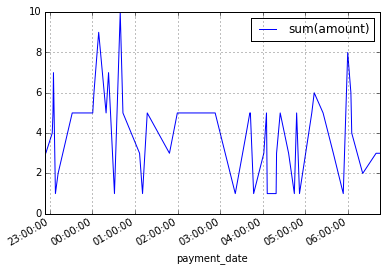

In [20]:
%matplotlib inline

df.plot()

In [19]:
df.head()

,sum(amount)
payment_date,
2005-05-24 22:53:30,2.99
2005-05-24 22:54:33,2.99
2005-05-24 23:03:39,3.99
2005-05-24 23:04:41,4.99
2005-05-24 23:05:21,6.99
